# Question 6
 plot the evolution of the density parameters for matter, radiation, dark energy and curvature

In [2]:
#for this we have to use camb, so first things first we import it 
import camb
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G

In [3]:
#now we define the cosmology
H0 = 67.4
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
omega_k = 0.001
ns = 0.965
tau = 0.054

pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2= omega_ch2, tau = tau)

pars.set_dark_energy(w=-1.0)

results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

The density parameters are define as

\begin{equation}
\Omega_s = \frac{\rho_s(t_0)}{\rho_{cr}}
\end{equation}
To calculate the densities we use the following expression 

\begin{equation}
\rho_s(a) = \Omega_s \rho_{cr} a ^ {-3(1-w_s)}
\end{equation}


where s is any constituent of the universe 

<>:31: SyntaxWarning: invalid escape sequence '\O'
<>:49: SyntaxWarning: invalid escape sequence '\O'
<>:31: SyntaxWarning: invalid escape sequence '\O'
<>:49: SyntaxWarning: invalid escape sequence '\O'
C:\Users\raque\AppData\Local\Temp\ipykernel_15268\624711185.py:31: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('$\Omega_s$')
C:\Users\raque\AppData\Local\Temp\ipykernel_15268\624711185.py:49: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('$\Omega_s$')


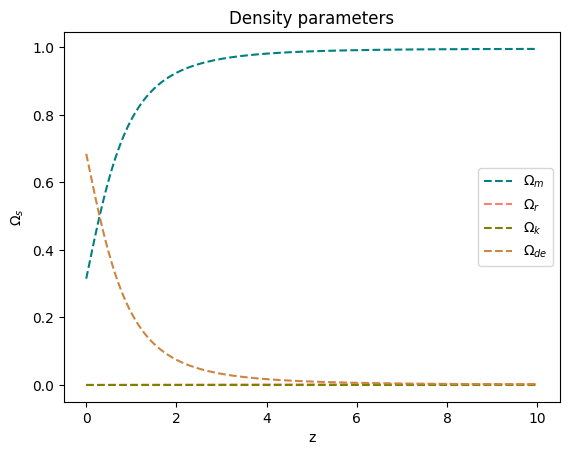

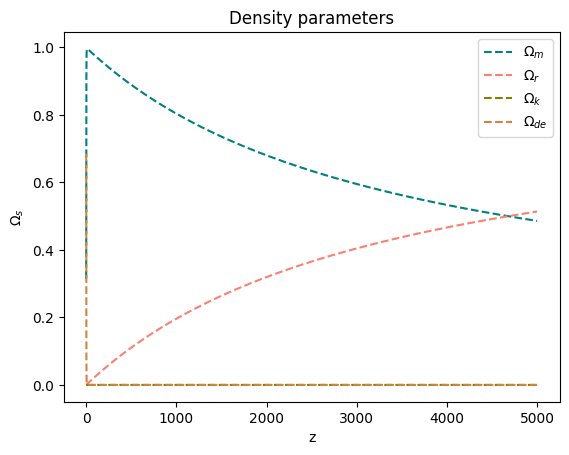

In [4]:
#so now we have to define a 
z = np.linspace(0.0, 10, 1000)
a = 1.0 / (1.0 + z)

#now we define the critic density
rho_cr = (3 * H0 ** 2) / (8 * np.pi * G)

#CAMB has a function that gives us the density parameters 
#so we are going to use that 
#for the matter we have to remeber that is baryons and cold dark amtter
Omega_m = results.get_Omega('cdm', z) + results.get_Omega('baryon', z) + results.get_Omega('nu', z)
Omega_r = results.get_Omega('photon', z) +  results.get_Omega('neutrino', z)
Omega_de =  results.get_Omega('de', z)
Omega_k =  1 - Omega_m - Omega_r - Omega_de

rho_m =  rho_cr * Omega_m 
rho_r =   rho_cr * Omega_r
rho_de =  Omega_de * a**(-3*(1-1.2))
rho_k =  rho_cr * Omega_k



#now we plot
plt.figure()
plt.plot(z, Omega_m, color = 'teal', label = r'$\Omega_m$', linestyle = 'dashed')
plt.plot(z, Omega_r, color = 'salmon',label = r'$\Omega_r$',linestyle = 'dashed')
plt.plot(z, Omega_k, color = 'olive',label = r'$\Omega_k$',linestyle = 'dashed')
plt.plot(z, Omega_de, color = 'peru',label = r'$\Omega_{de}$',linestyle = 'dashed')
plt.title('Density parameters')
plt.xlabel('z')
plt.ylabel('$\Omega_s$')
plt.legend()
plt.show()

#we can also plot for a different redshift just to see how it may behave
Z = np.linspace(0,5000,10000)
Omega_m = results.get_Omega('cdm', Z) + results.get_Omega('baryon', Z) + results.get_Omega('nu', Z)
Omega_r = results.get_Omega('photon', Z) +  results.get_Omega('neutrino', Z)
Omega_de =  results.get_Omega('de', Z)
Omega_k =  1 - Omega_m - Omega_r - Omega_de

plt.figure()
plt.plot(Z, Omega_m, color = 'teal', label = r'$\Omega_m$', linestyle = 'dashed')
plt.plot(Z, Omega_r, color = 'salmon',label = r'$\Omega_r$',linestyle = 'dashed')
plt.plot(Z, Omega_k, color = 'olive',label = r'$\Omega_k$',linestyle = 'dashed')
plt.plot(Z, Omega_de, color = 'peru',label = r'$\Omega_{de}$',linestyle = 'dashed')
plt.title('Density parameters')
plt.xlabel('z')
plt.ylabel('$\Omega_s$')
plt.legend()
plt.show()


As we can see, the $\Omega_k$ is close to zero, if not equal to, wich means that we are mostlikely in an euclidean universe or something very close to that. 

Also we can see where the $\Omega_r$ and $\Omega_m$ meet, this happens around z = 0.5 and z = 4800

# Question 7

The distance duality relation gives
\begin{equation}
    D_{L}(z) = (1+z)^{2} D_{A}(z),
\end{equation}
where $D_{L}(z)$ and $D_{A}(z)$ are the luminosity distance and angular diameter distance, respectively, as a function of the redshift $z$. Using Python, plot the lines of constant $f_{K}(\chi)$ in the plane $\Omega_{m,0} - \Omega_{\Lambda,0}$, where

\begin{equation}
f_{K}(\chi) = 
\begin{cases}
    \dfrac{c}{H_{0}\sqrt{\Omega_{K,0}}}
    \sinh\!\left( \sqrt{\Omega_{K,0}} 
    \int_{0}^{z} \dfrac{dx}{E(x)} \right),
    & \Omega_{K,0} > 0, \\[1.5em]
    \dfrac{c}{H_{0}} \int_{0}^{z} \dfrac{dx}{E(x)}, 
    & \Omega_{K,0} = 0, \\[1.5em]
    \dfrac{c}{H_{0}\sqrt{-\Omega_{K,0}}}
    \sin\!\left( \sqrt{-\Omega_{K,0}} 
    \int_{0}^{z} \dfrac{dx}{E(x)} \right),
    & \Omega_{K,0} < 0.
\end{cases}
\end{equation}

Where $E(z) = H(z)/H_0$ and $H(Z)$ can be calculated with the first Friedmann equation
\begin{equation}
H^2(z) = H_0^2[\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}(1+z)^{3(1+w)} + \Omega_{K,0}(1+z)^2]
\end{equation}


In [ ]:
#we import the libraries that are missing for this problem
import scipy.integrate as integrate
from scipy.constants import c


<>:66: SyntaxWarning: invalid escape sequence '\O'
<>:67: SyntaxWarning: invalid escape sequence '\O'
<>:75: SyntaxWarning: invalid escape sequence '\O'
<>:76: SyntaxWarning: invalid escape sequence '\O'
<>:83: SyntaxWarning: invalid escape sequence '\O'
<>:84: SyntaxWarning: invalid escape sequence '\O'
<>:66: SyntaxWarning: invalid escape sequence '\O'
<>:67: SyntaxWarning: invalid escape sequence '\O'
<>:75: SyntaxWarning: invalid escape sequence '\O'
<>:76: SyntaxWarning: invalid escape sequence '\O'
<>:83: SyntaxWarning: invalid escape sequence '\O'
<>:84: SyntaxWarning: invalid escape sequence '\O'
C:\Users\raque\AppData\Local\Temp\ipykernel_15268\2052566109.py:66: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$\Omega_{\Lambda,0}$')
C:\Users\raque\AppData\Local\Temp\ipykernel_15268\2052566109.py:67: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('$\Omega_{m,0}$')
C:\Users\raque\AppData\Local\Temp\ipykernel_15268\2052566109.py:75: SyntaxWarning: invalid escap

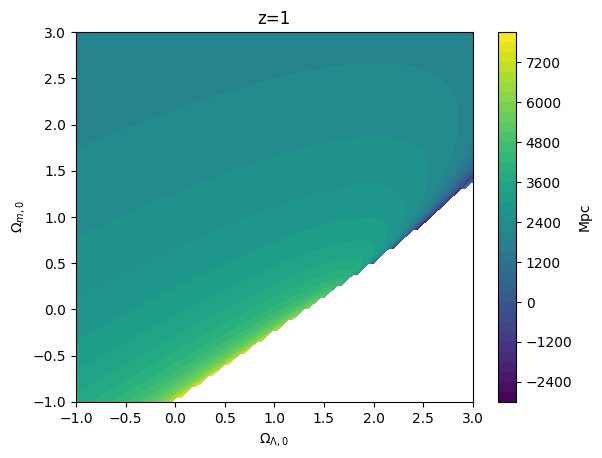

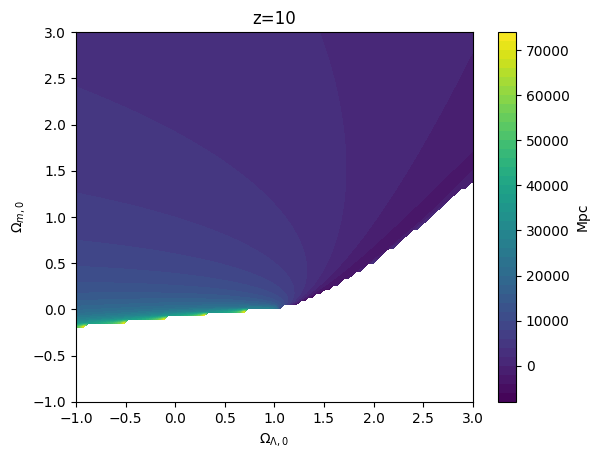

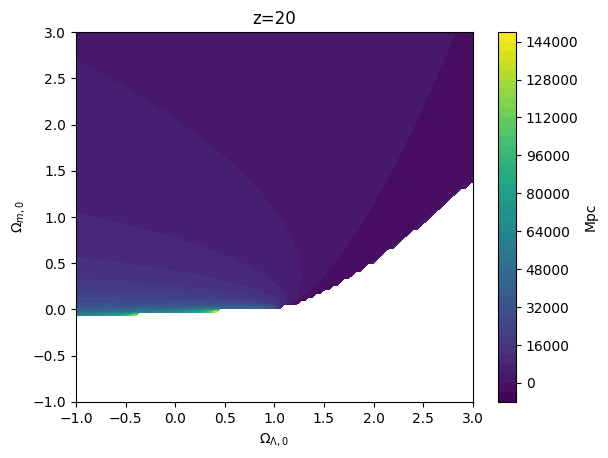

In [27]:
z = np.linspace(0, 10, 1000)
Omega_r0 = 8.24 * 10 ** (-5) #value of Omega_{r0} today
zl=1000

def Hubble(z, omegam0, omegal0):
    omegam0 = np.asarray(omegam0)
    omegal0 = np.asarray(omegal0)
    z = np.asarray(z)

    #to define Omega_k0 we use that the sum of every omega is 1
    #so we substrate 
    Omega_k0 = 1 - omegam0[:, None] - omegal0[None, :] - Omega_r0

    #with this we define the hubble parameter using the friedmann equation
    H = H0 * np.sqrt(Omega_r0 * (1 + z[:, None, None])**4 + 
                     omegam0[None, :, None] * (1 + z[:, None, None])**3 + 
                     omegal0[None, None, :] + 
                     Omega_k0[None, :, :] * (1 + z[:, None, None])**2)
    return H

#now we define the function f_k

def f_k(z,omegam0,omegal0):

    lz=len(z)
    lomega1=len(omegam0)
    lomega2=len(omegal0)
    fk=np.zeros((lomega1,lomega2))

    e=Hubble(z,omegam0,omegal0)/H0
    mz=np.max(z)

    int_e=np.zeros((lomega1,lomega2))
    for i in range(0,lomega1):
        for j in range(0,lomega2):
            int_e[i,j]=integrate.trapezoid(1/e[:,i,j],z)

    for i in range(0,lomega1):
        for j in range(0,lomega2):
            omegak0= 1 -omegam0[i] - omegal0[j] - Omega_r0

            if omegak0>0:   
                fk[i,j]= c/(H0*np.sqrt(omegak0))*np.sinh(np.sqrt(omegak0)*int_e[i,j])
            if omegak0==0:
                fk[i,j]= c/H0*int_e[i,j]
            if omegak0<0:
                fk[i,j]= c/(H0*np.sqrt(-omegak0))*np.sin(np.sqrt(-omegak0)*int_e[i,j])    
    return fk

#values for omegal0 and omegam0
x = np.linspace(-1, 3, 100)
y = np.linspace(-1, 3, 100)

fk1 = f_k(z, x, y)

z = np.linspace(0, 20, 1000)

fk2 = f_k(z, x, y)

z = np.linspace(0, 1, 1000)

fk3 = f_k(z, x, y)

plt.contourf(x,y,fk3,levels=40)

plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=1')
plt.colorbar(label='Mpc')
plt.show()


plt.contourf(x,y,fk1,levels=40)

plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=10')
plt.colorbar(label='Mpc')
plt.show()

plt.contourf(x,y,fk2,levels=40)

plt.xlabel('$\Omega_{\Lambda,0}$')
plt.ylabel('$\Omega_{m,0}$')
plt.title('z=20')
plt.colorbar(label='Mpc')
plt.show()




We can see that there are areas where there is not a $f_K$ defined, this tells us that there is not a mathematical, or physical, solution.
Also, there are zones where $f_K$ is negative, which means that we are measuring negative distances. This does not maake sence.

